TypeError: plot() got an unexpected keyword argument 'x'

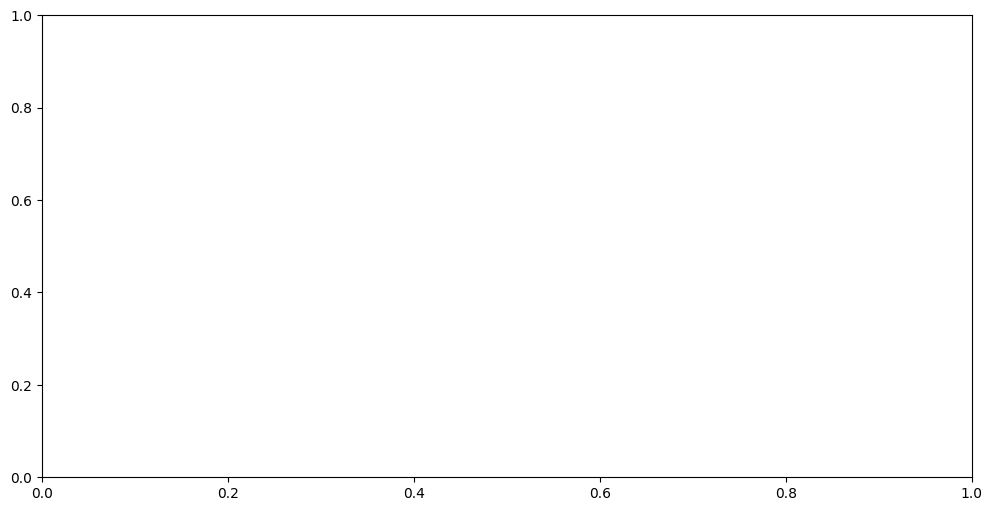

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
# Assuming the dataset is in a CSV file named 'cricket_data.csv'
df=pd.read_csv('CWC23_all_innings.csv')

# Convert 'start_date' column to datetime
df['start_date'] = pd.to_datetime(df['start_date'])

# Sort the DataFrame by 'start_date'
df.sort_values(by='start_date', inplace=True)

df_bat=df[df['bat_or_bowl']=='bat']
df_bowl=df[df['bat_or_bowl']=='bowl']

# Plotting trends over time
plt.figure(figsize=(12, 6))


# Example: Runs over time
plt.plot(x='start_date', y='runs', data=df_bat, hue='team')
plt.title('Runs Over Time')
plt.xlabel('Start Date')
plt.ylabel('Runs')
plt.show()

# Example: Wickets over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='wkts', data=df_bowl, hue='team')
plt.title('Wickets Over Time')
plt.xlabel('Start Date')
plt.ylabel('Wickets')
plt.show()


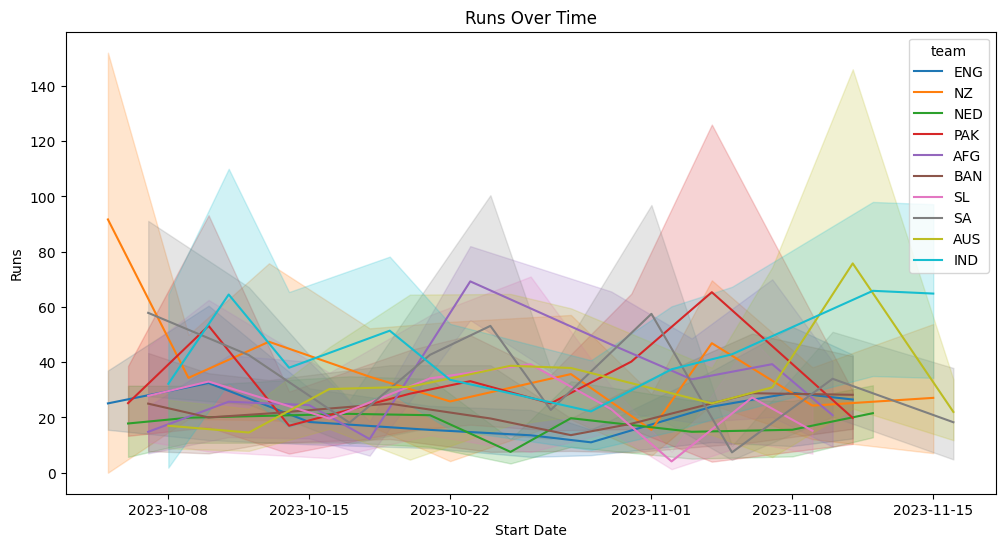

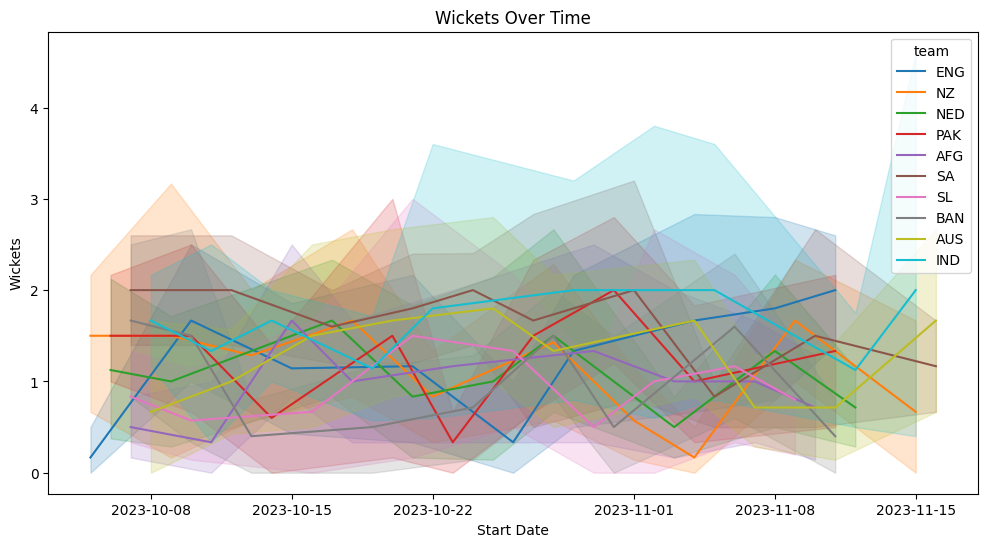

In [10]:
# Plotting trends over time
plt.figure(figsize=(12, 6))


# Example: Runs over time
sns.lineplot(x='start_date', y= 'runs', data=df_bat, hue='team')
plt.title('Runs Over Time')
plt.xlabel('Start Date')
plt.ylabel('Runs')
plt.show()

# Example: Wickets over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y='wkts', data=df_bowl, hue='team')
plt.title('Wickets Over Time')
plt.xlabel('Start Date')
plt.ylabel('Wickets')
plt.show()


In [12]:
teams=['AFG',
 'AUS',
 'BAN',              
'ENG',             
'IND',             
'NED',             
'NZ',             
'PAK',              
'SA',             
'SL'] 

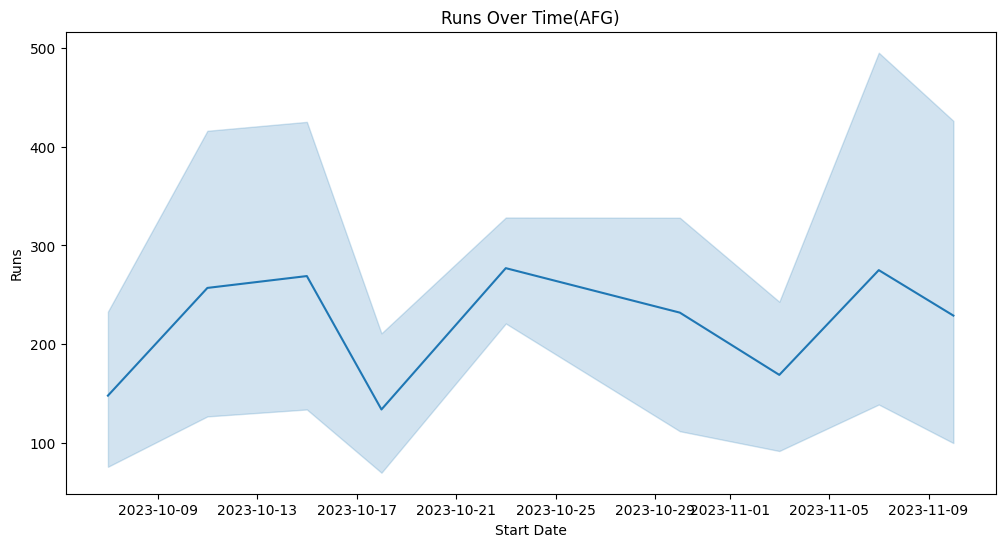

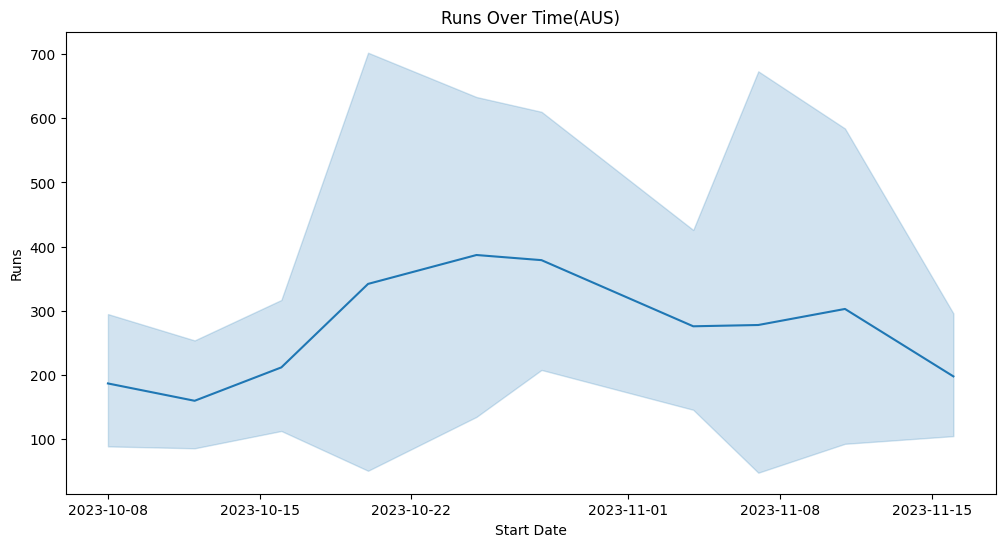

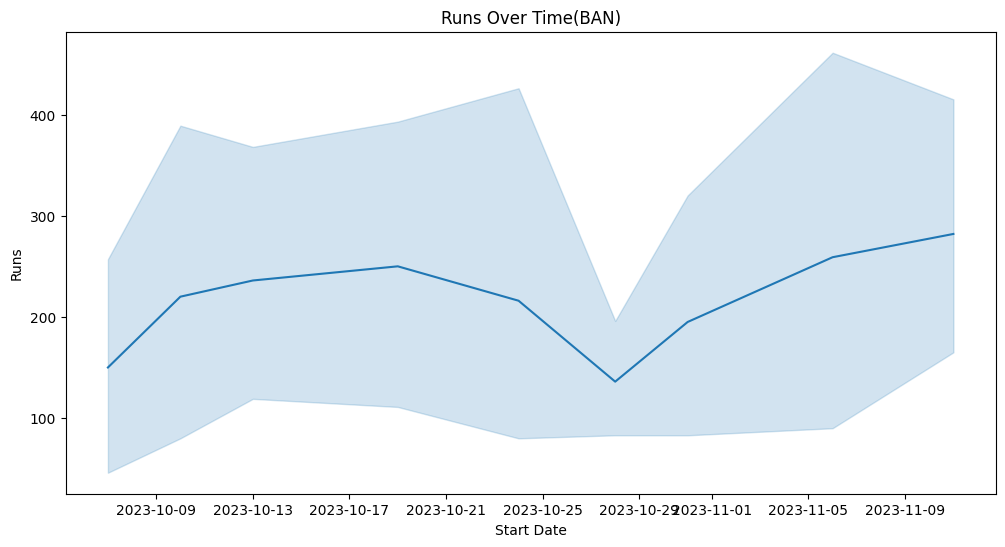

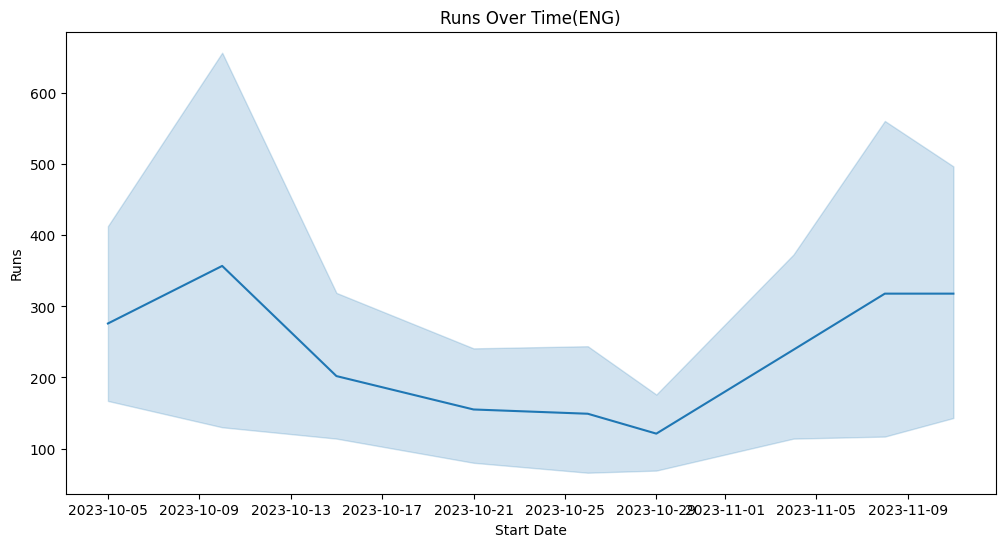

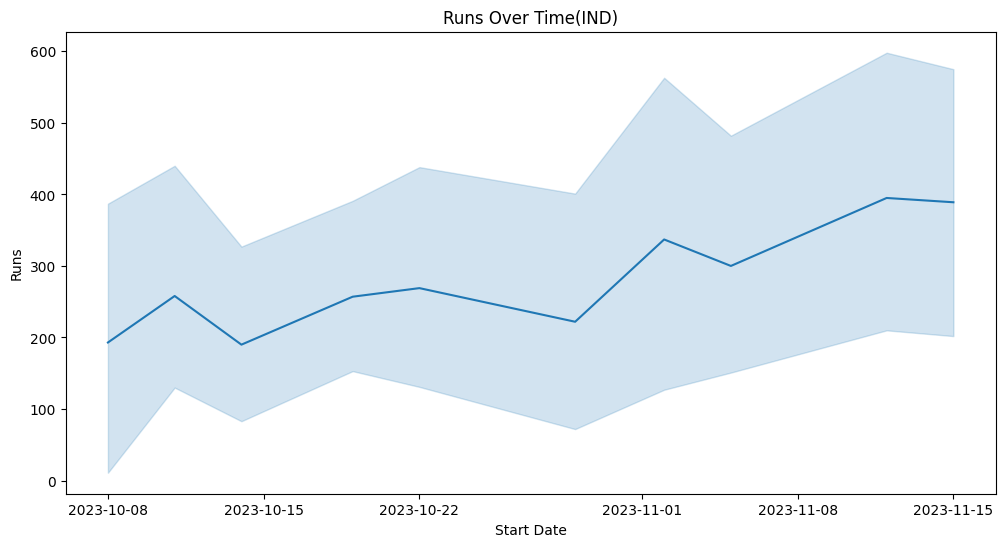

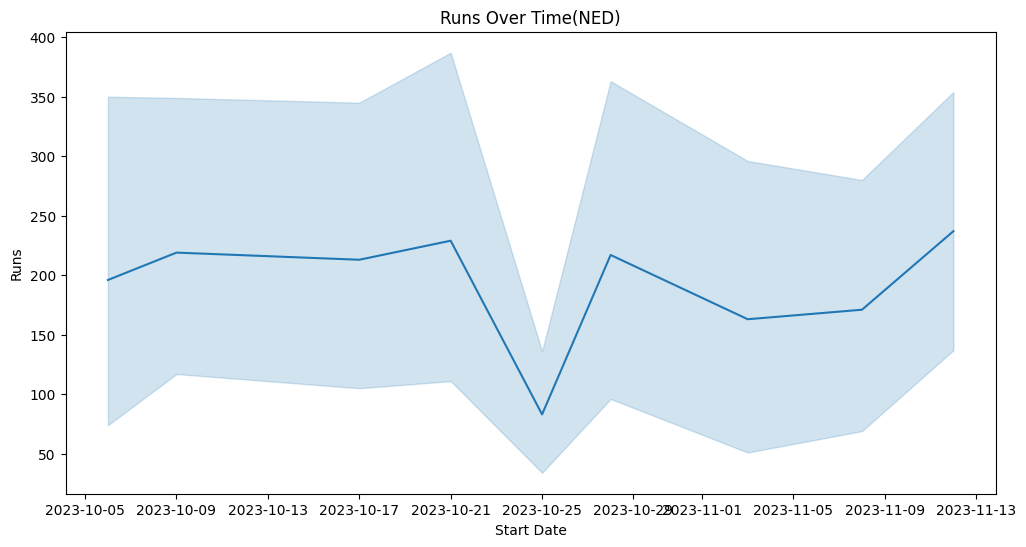

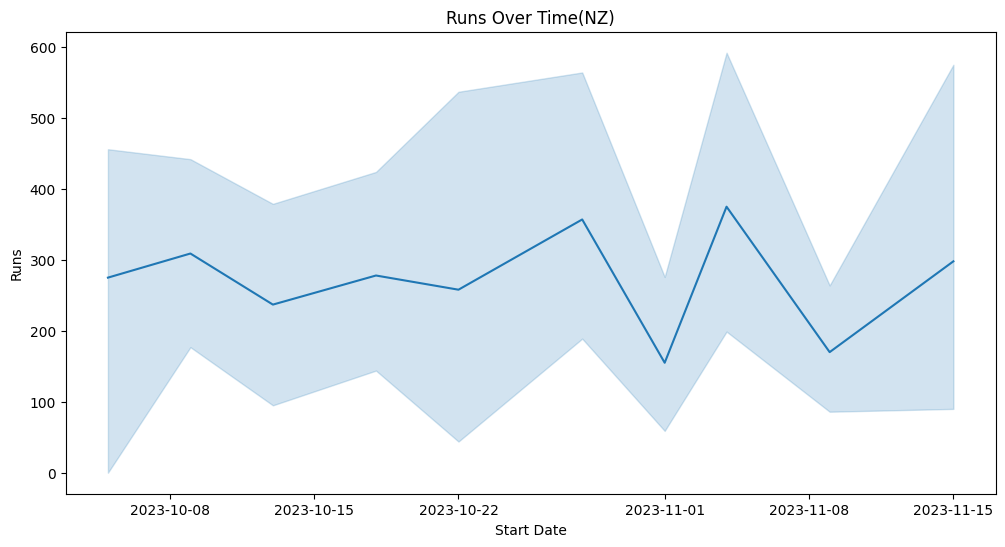

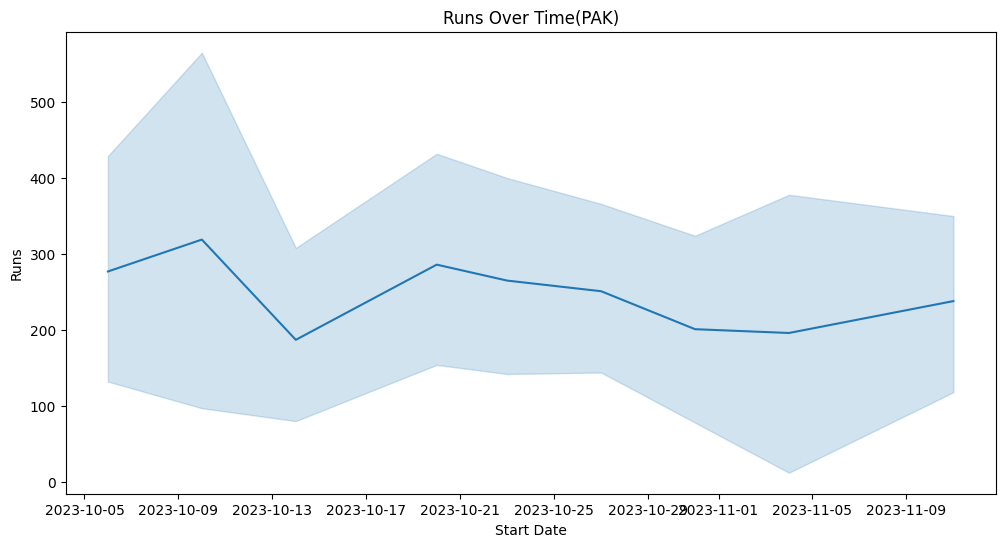

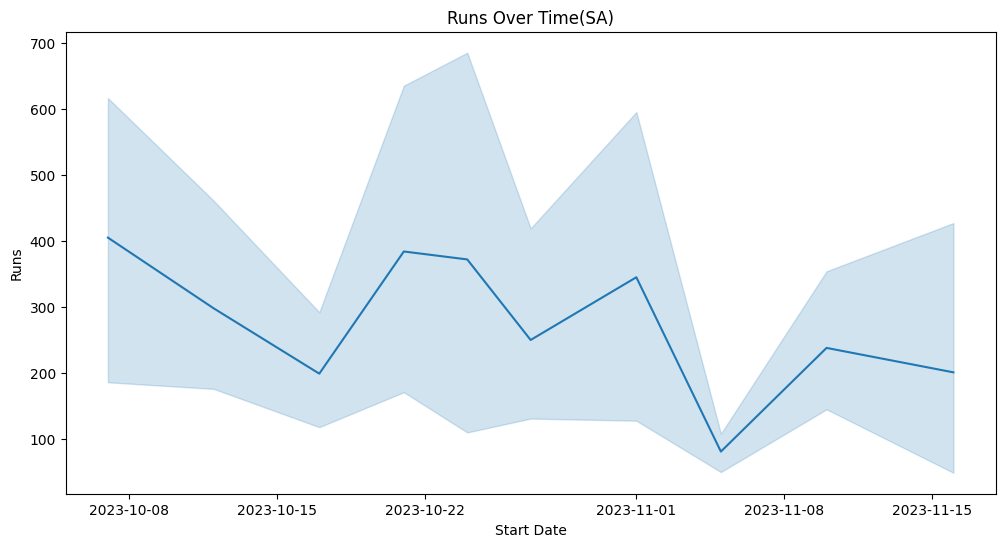

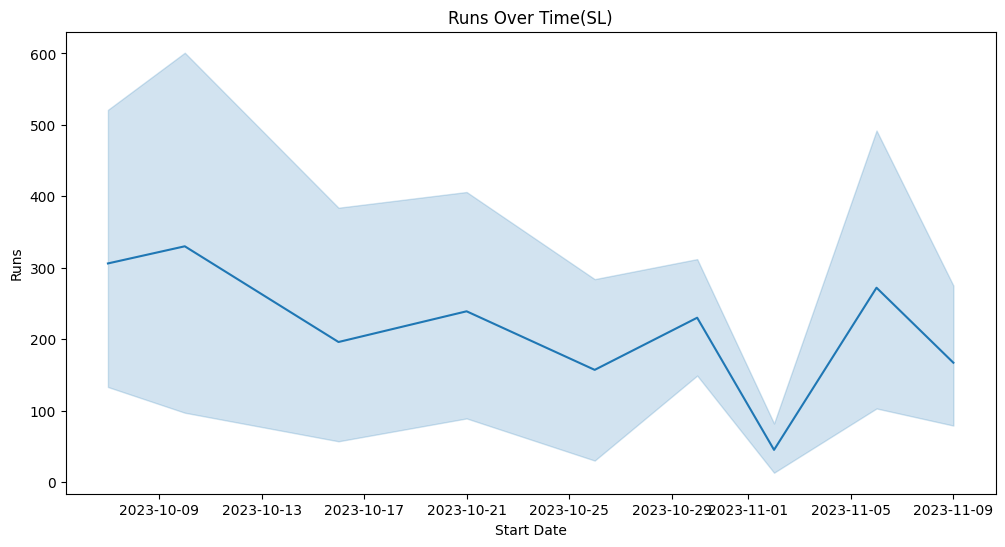

In [19]:
for i in teams:
    plt.figure(figsize=(12, 6))
    sns.lineplot(x='start_date', y= 'runs', data=df_bat[df_bat['team']==i], estimator=sum)
    plt.title(f'Runs Over Time({i})')
    plt.xlabel('Start Date')
    plt.ylabel('Runs')
    plt.show()



C:\Users\sumit\AppData\Local\Temp\ipykernel_7684\3324314116.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sns.lineplot(x='start_date', y= 'runs', data=df_bat.groupby(['team', 'start_date']).sum(), estimator=None,hue='team')


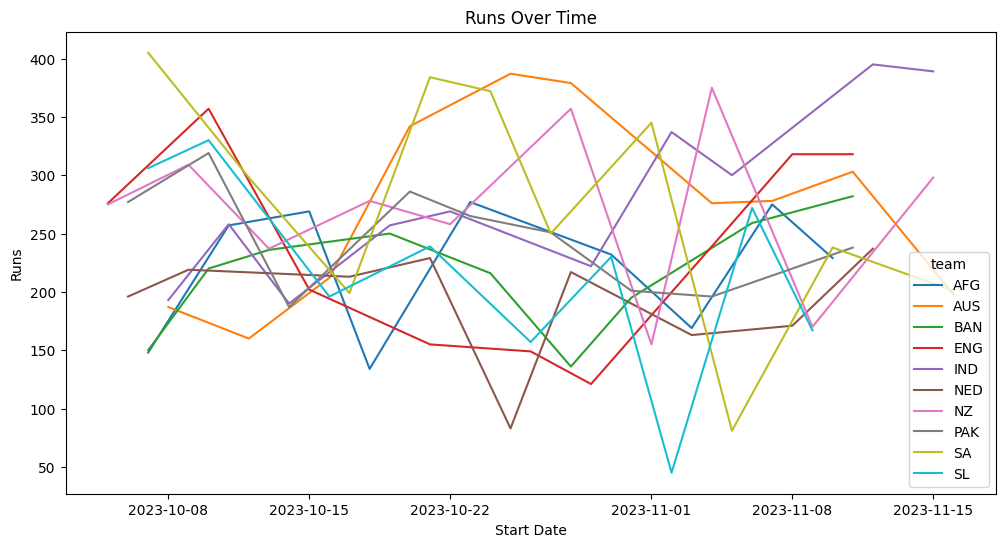

In [22]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='start_date', y= 'runs', data=df_bat.groupby(['team', 'start_date']).sum(), estimator=None,hue='team')
plt.title(f'Runs Over Time')
plt.xlabel('Start Date')
plt.ylabel('Runs')
plt.show()

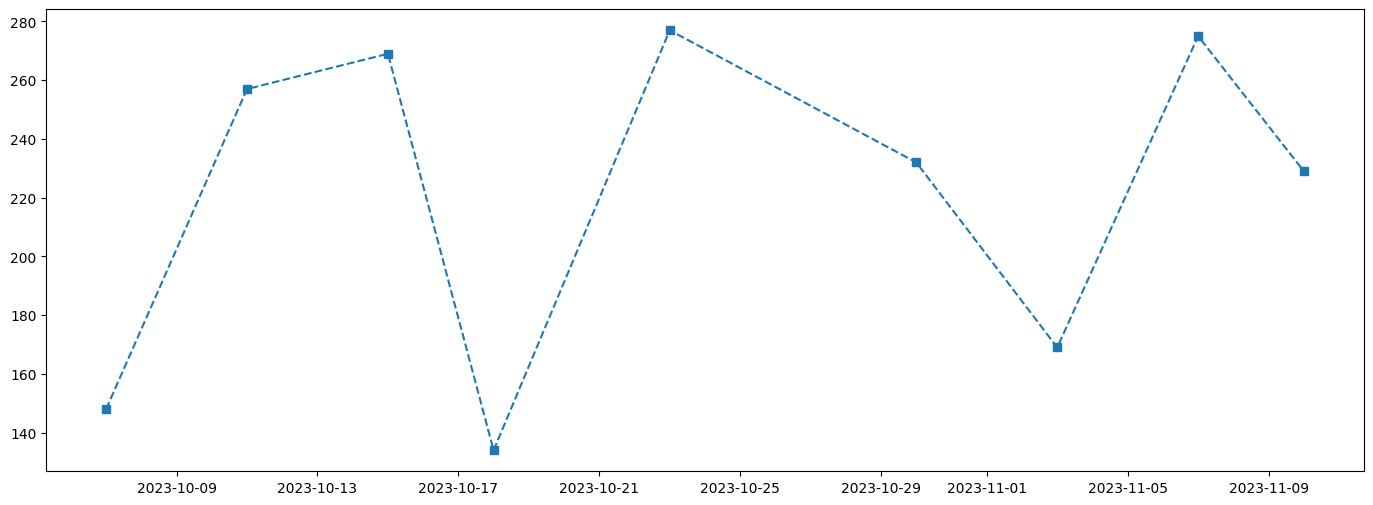

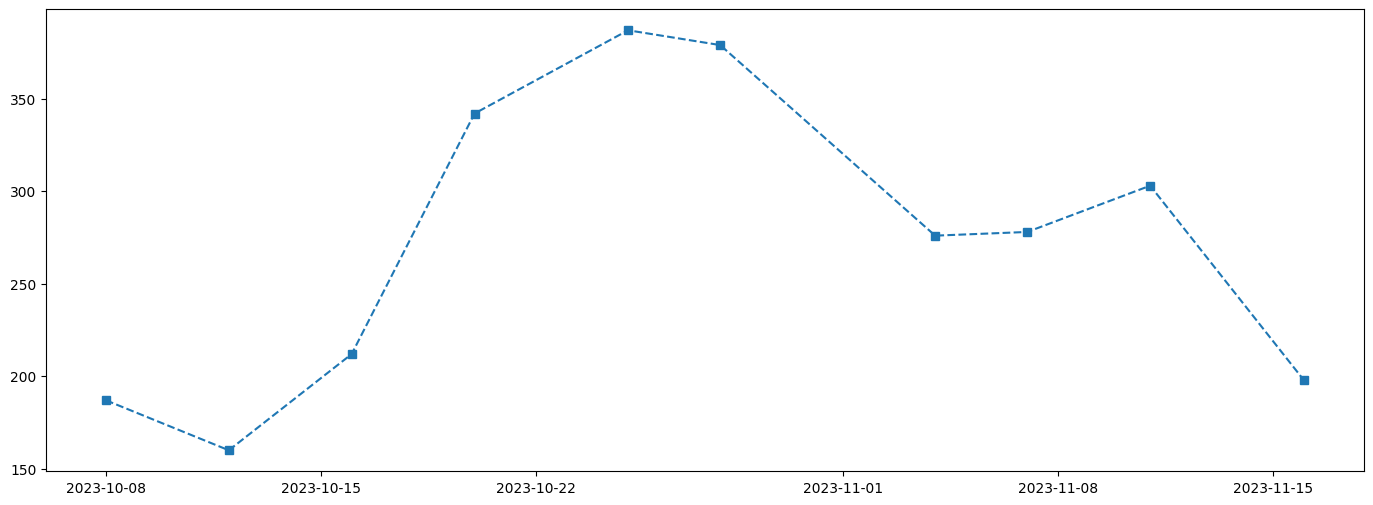

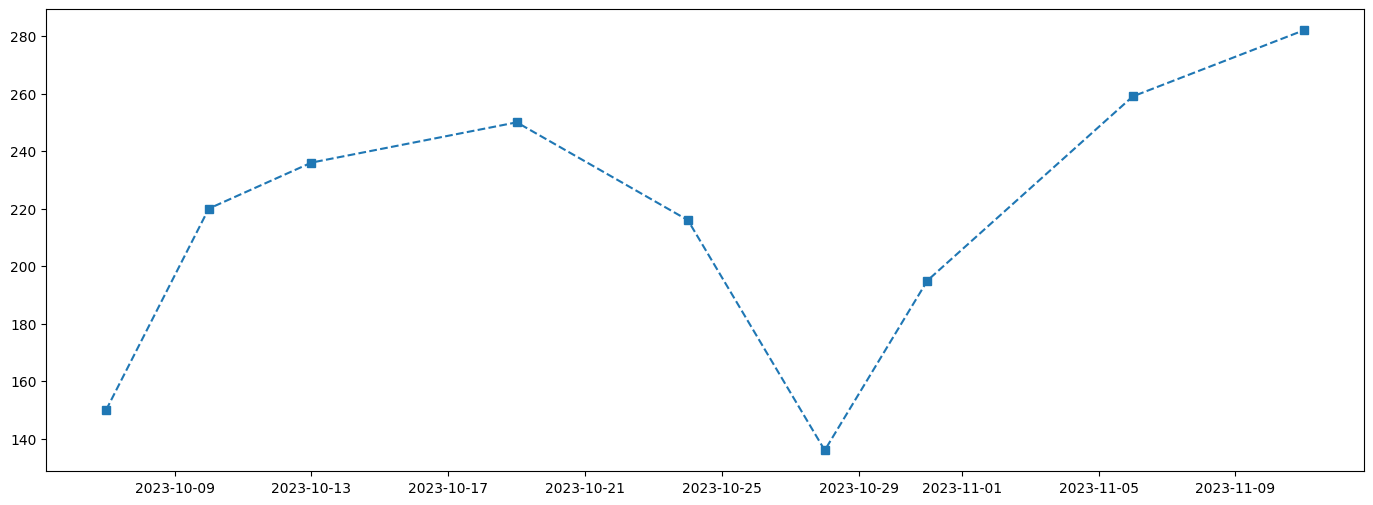

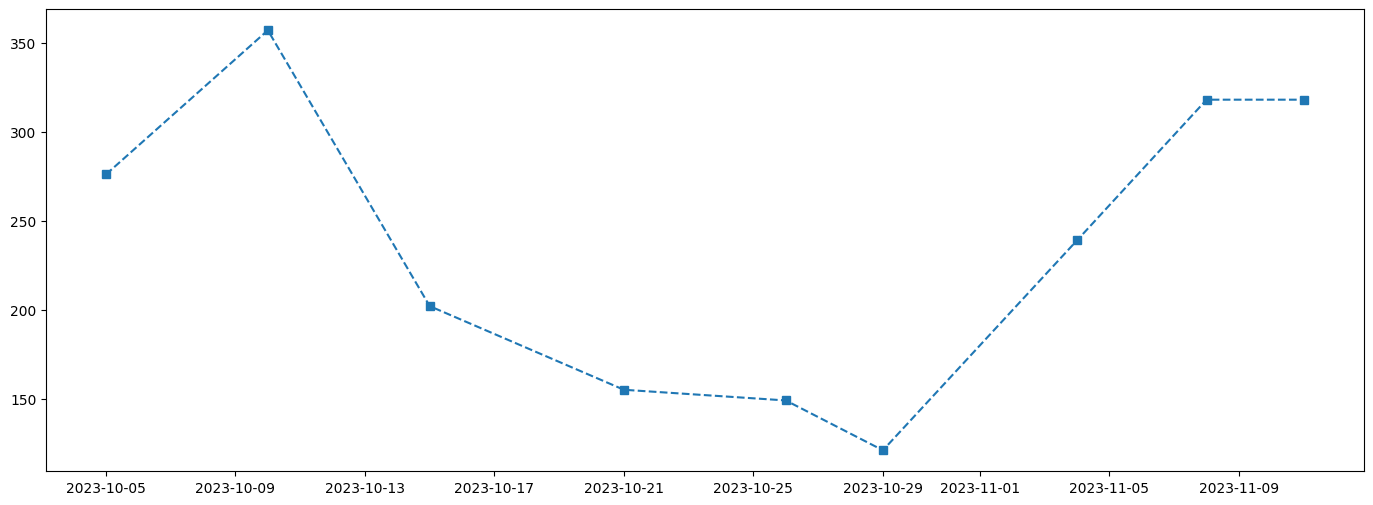

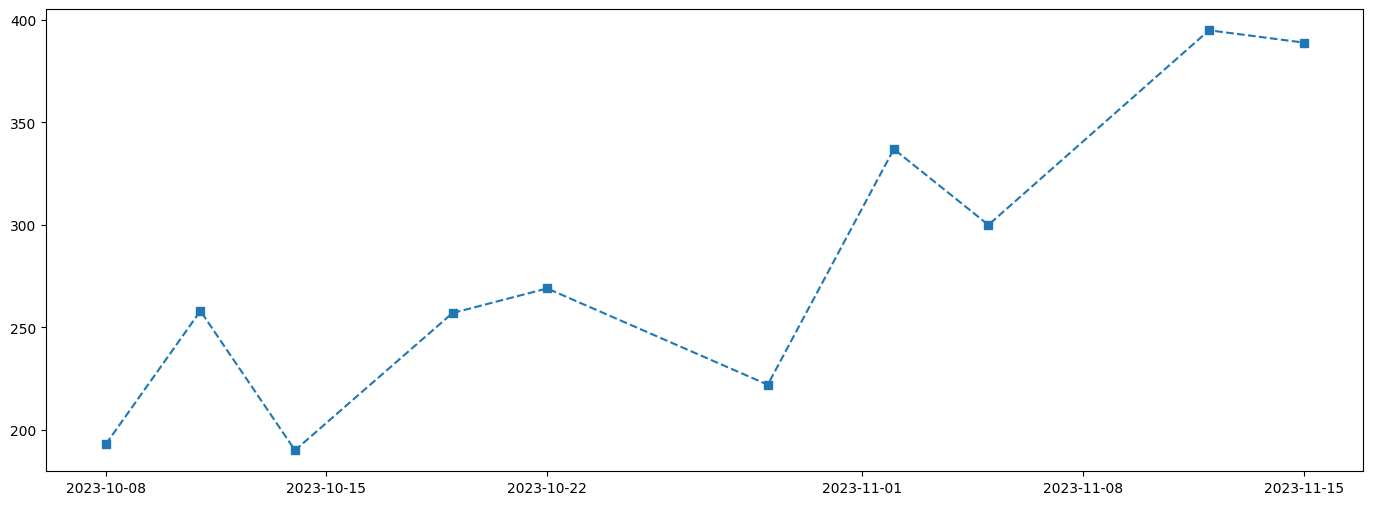

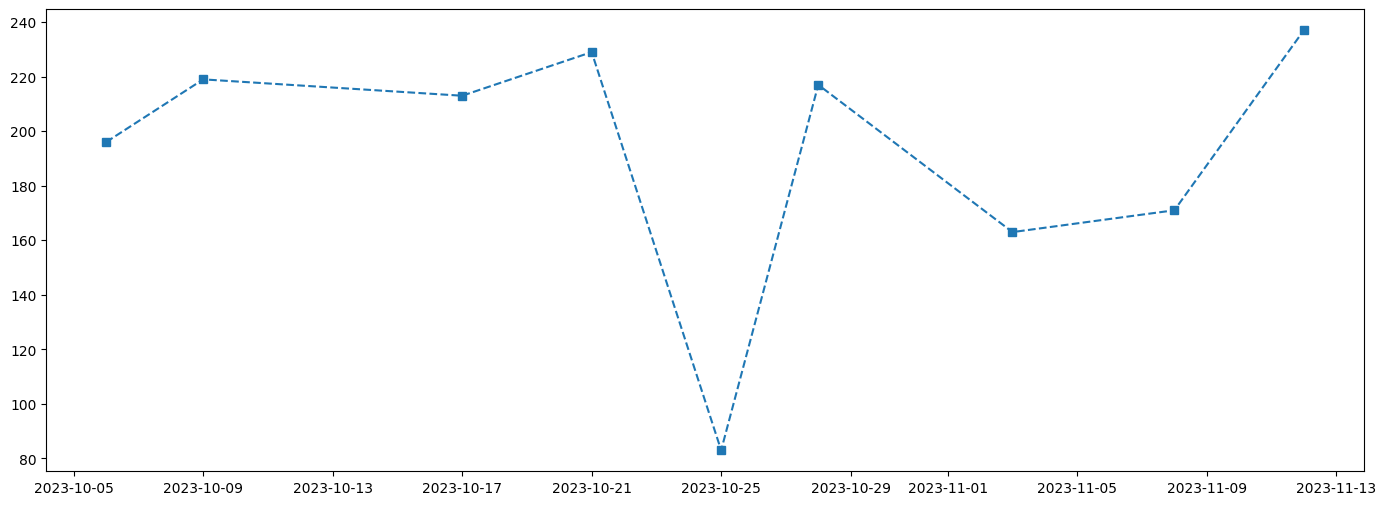

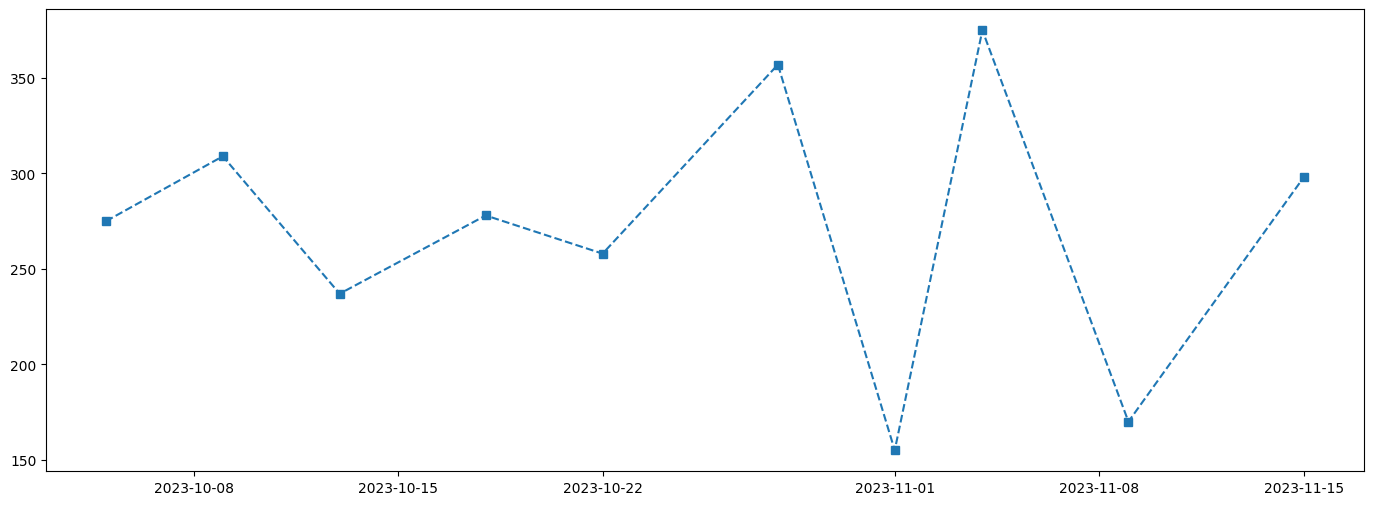

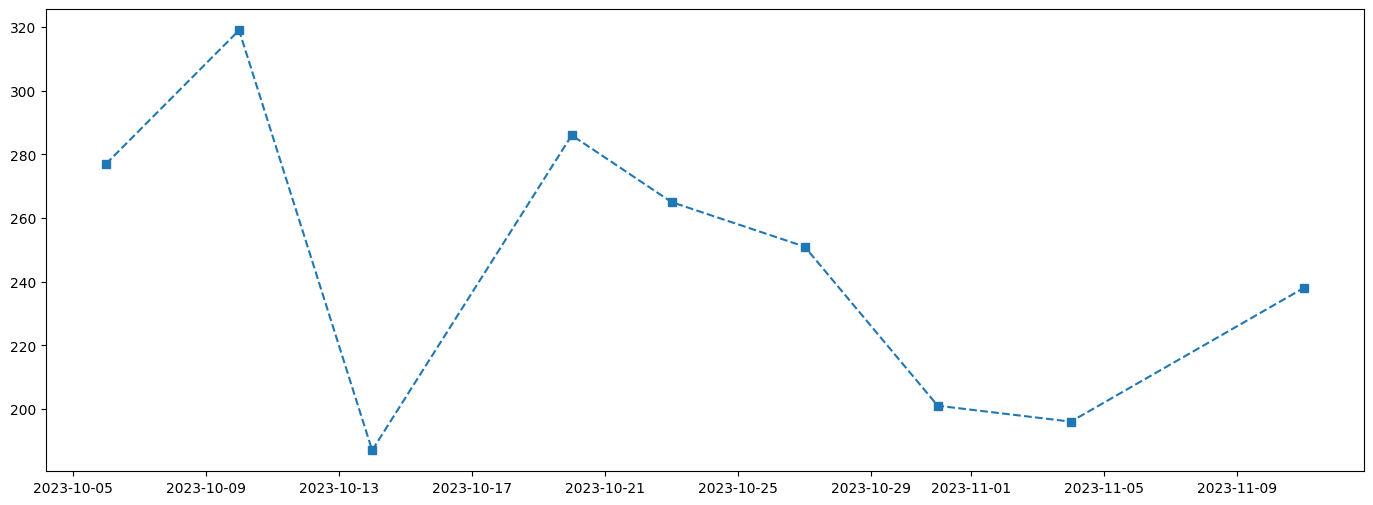

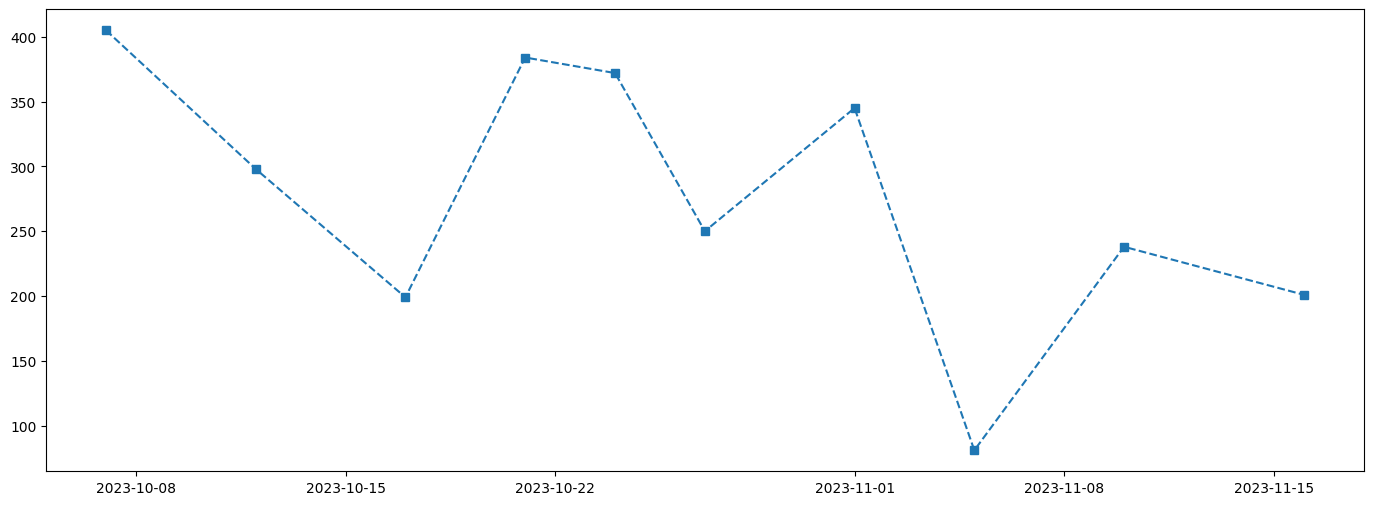

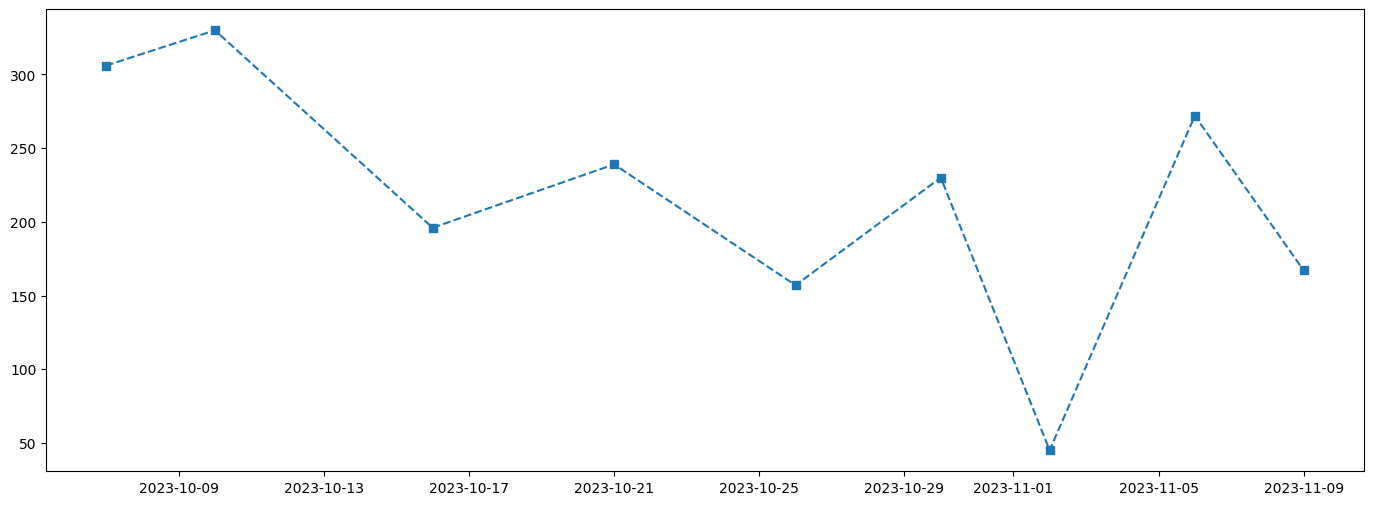

In [16]:
for i in teams:
    data=df_bat[df_bat['team']==i].groupby(['start_date'])['runs'].sum()
    plt.figure(figsize=(17, 6))
    plt.plot(data.index.get_level_values('start_date'),data,'s--')

In [10]:
data=df_bat.groupby(['team', 'start_date'])['runs'].sum()
datez=data.keys()[:]
datez[:]

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [22]:
data=df_bat.groupby(['team','start_date'])['runs'].sum()
    # plt.figure(figsize=(17, 6))
    # plt.plot(data.index.get_level_values('start_date'),data,'s--')
import plotly 
from plotly import express
plotly.express.line(x=data.index.get_level_values('start_date'),y=data,line_group=data.index.get_level_values('team'),color=data.index.get_level_values('team'))

In [38]:
for i in teams:
    data=df_bat[df_bat['team']==i].groupby(['start_date'])['runs'].sum()
    fig=plotly.express.line(x=data.index.get_level_values('start_date'),y=data,title=i)
    data2=df_bat[df_bat['team']==i].groupby(['start_date'])['runs'].rolling(2).sum()
    plotly.express.line(x=data2.index.get_level_values('start_date'),y=data2,title=i)
    fig.show()

In [40]:
import plotly.graph_objects as go

for i in teams:
    data=df_bat[df_bat['team']==i].groupby(['start_date'])['runs'].sum()
    data2=df_bat[df_bat['team']==i].groupby(['start_date'])['runs'].rolling(2).sum()
    fig = go.Figure(
        plotly.express.line(x=data.index.get_level_values('start_date'),y=data,title=i),
        plotly.express.line(x=data2.index.get_level_values('start_date'),y=data2,title=i)
        )
    fig.show()


fig.show(renderer="svg")

ValueError: 
Image export using the "kaleido" engine requires the kaleido package,
which can be installed using pip:
    $ pip install -U kaleido


In [ ]:
import plotly.graph_objects as go
import plotly.express as px

teams = df_bat['team'].unique()  # Assuming 'teams' is a list of team names

fig = go.Figure()

for i in teams:
    data = df_bat[df_bat['team'] == i].groupby(['start_date'])['runs'].sum()
    data2 = df_bat[df_bat['team'] == i].groupby(['start_date'])['runs'].rolling(2).sum()

    fig.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name=f'{i} - Runs'))
    fig.add_trace(go.Scatter(x=data2.index, y=data2, mode='lines', name=f'{i} - Running Total'))

    fig.update_layout(title='Runs and Running Total for Teams', xaxis_title='Date', yaxis_title='Runs')
    fig.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

teams = df_bat['team'].unique()  # Assuming 'teams' is a list of team names

for i in teams:
    data = df_bat[df_bat['team'] == i].groupby(['start_date'])['runs'].sum()
    data2 = df_bat[df_bat['team'] == i].groupby(['start_date'])['runs'].rolling(3).sum()

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name=f'{i} - Runs'))
    fig.add_trace(go.Scatter(x=data2.index, y=data2, mode='lines', name=f'{i} - Running Total'))

    fig.update_layout(title=f'Runs and Running Total for {i}', xaxis_title='Date', yaxis_title='Runs')
    fig.show()


In [50]:
import plotly.graph_objects as go
import plotly.express as px

teams = df_bat['team'].unique()  

for i in teams:
    data = df_bat[df_bat['team'] == i].groupby(['start_date'])['runs'].sum()
    

    fig = go.Figure()

    fig.add_trace(go.Scatter(x=data.index, y=data, mode='lines', name=f'{i} - Runs'))

    fig.update_layout(title=f'Runs and Running Total for {i}', xaxis_title='Date', yaxis_title='Runs')
    fig.show()
